---
# Session 8 - Econometric Approaches
---

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%cd /content/drive/MyDrive/Colab Notebooks

# Load data from Excel
df = pd.read_excel("data/datarium-marketing.xlsx")

# Define dependent and independent variables
X = df["youtube"]
y = df["sales"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()


/content/drive/MyDrive/Colab Notebooks


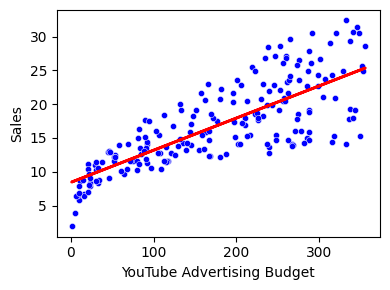

In [2]:
# Plot data and regression line
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.scatterplot(x="youtube", y="sales", data=df, color="blue", s=20)
plt.plot(df["youtube"], model.predict(X), color="red", linewidth=2)
plt.xlabel("YouTube Advertising Budget")
plt.ylabel("Sales")
plt.tight_layout()
#plt.savefig("Marketing-SalesYoutube_OLS_Python.pdf")
plt.show()



In [ ]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        10:49:42   Log-Likelihood:                -555.51
No. Observations:                 200   AIC:                             1115.
Df Residuals:                     198   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4391      0.549     15.360      0.0

In [ ]:
# Define dependent and independent variables
X = df[["youtube", "facebook", "newspaper"]]  # Multiple predictors
y = df["sales"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.58e-96
Time:                        10:50:20   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

# Logistic Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Load dataset
df = sns.load_dataset("titanic")

# Select and clean data
df = df[["survived", "pclass", "sex", "age"]].dropna()

# Convert categorical variables to dummies
df = pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)

# Ensure all predictors are numeric
X = df.drop("survived", axis=1)
X = X.astype(float)             # <-- ensure numeric dtype
X = sm.add_constant(X)          # add intercept

y = df["survived"].astype(int)  # ensure binary target is int

# Fit logistic regression model
model_logit = sm.Logit(y, X).fit()

# Show results
print(model_logit.summary())


Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Jul 2025   Pseudo R-squ.:                  0.3289
Time:                        10:48:28   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7770      0.401      9.416      0.000       2.991       4.563
age           -0.0370      0.